# Temporal heatmaps (Demo)

In [45]:
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE


In [46]:
def generateCurve(n, _freq, samplingrate, err, phase):
    trajectory = []
    n = int(n)
    for i in range(n):
        freq = random.uniform(_freq[0], _freq[1])
        line = np.arange(1, 101, samplingrate)
        error = [random.random()*err for x in range(len(line))] 
        l = np.sin((freq*line)+phase )+error
        trajectory.append(l)
    return trajectory #random sine curve + random error



In [47]:
n_samples = 250
samplingrate = 1

### Generating sample Sine Curve dataset

In [48]:
c1 = generateCurve(n_samples/3, (0.1, 0.12), samplingrate, 0.2, 5)
c2 = generateCurve(n_samples/3, (0.2, 0.22), samplingrate, 0.4, 12)
c3 = generateCurve(n_samples/3, (0.2, 0.22), samplingrate, 0.4, -10)






In [49]:
trajectory = []
trajectory.extend(c1)
trajectory.extend(c2)
trajectory.extend(c3)

labels = []
labels.extend([0]*len(c1))
labels.extend([1]*len(c2))
labels.extend([2]*len(c3))

#random.shuffle(trajectory)

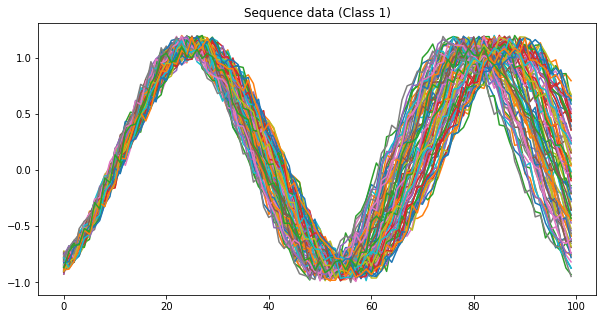

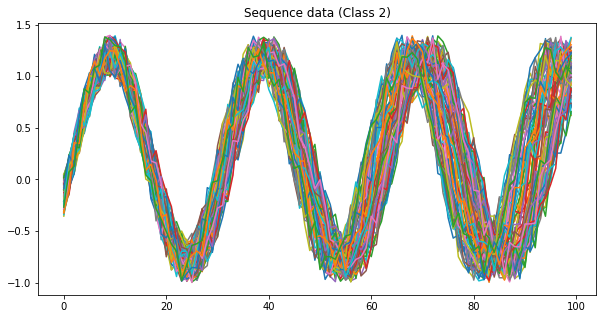

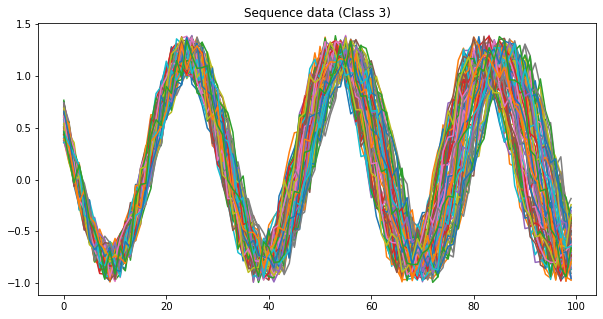

In [50]:
for i,classes in enumerate([c1,c2,c3]):
    fig = plt.figure(figsize=(10,5))
    plt.title('Sequence data (Class ' + str(i+1)+')')
    for curve in classes:
        plt.plot(curve)
    plt.show()

### Generating TSNE plot to view sequence data in 2D

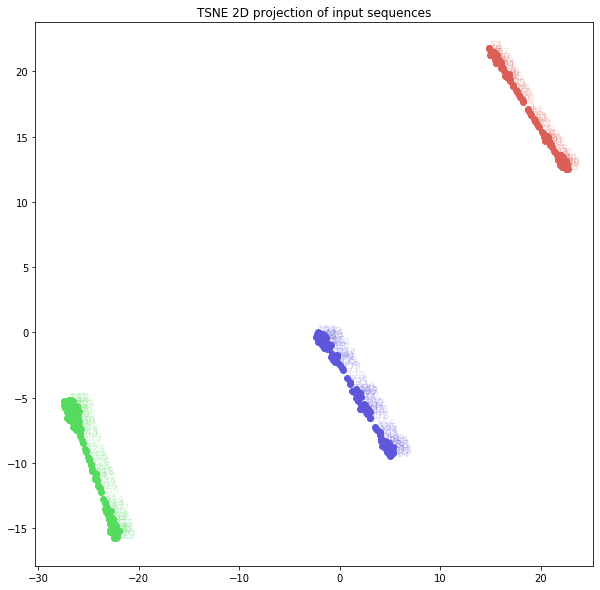

In [51]:
fig = plt.figure(figsize=(10,10))
plt.title('TSNE 2D projection of input sequences')
pal = sns.color_palette("hls", 3)

X_embedded = TSNE(random_state=42, n_components =2).fit_transform(trajectory)

for i, txt in enumerate(labels):
    plt.scatter(X_embedded.T[0][i], X_embedded.T[1][i], color=pal[txt])
    plt.annotate(i, (X_embedded.T[0][i], X_embedded.T[1][i]), color=pal[txt], alpha=0.2)
plt.show()

### Plotting temporal heatmaps for sample Sine curve dataset

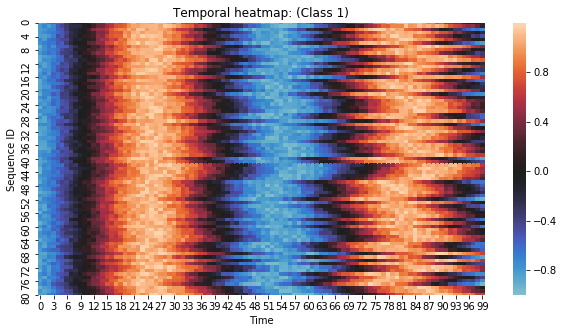

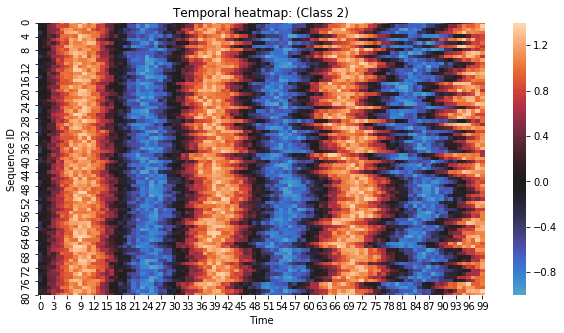

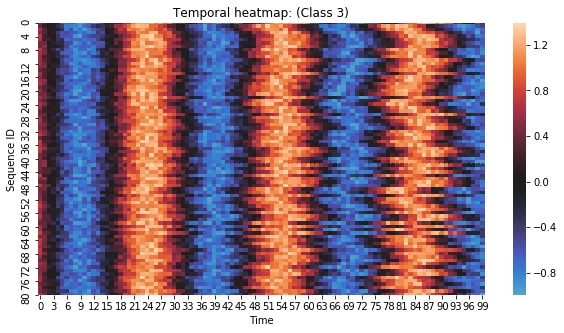

In [52]:
for i,classes in enumerate([c1,c2,c3]):
    fig = plt.figure(figsize=(10,5))
    plt.title('Temporal heatmap: (Class ' + str(i+1)+')')
    traj = []
    for curve in classes:
        traj.append(curve)
    sns.heatmap(traj, center=0.0)
    plt.xlabel('Time')
    plt.ylabel('Sequence ID')
    plt.show()
